In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import importlib
import os
import sys

from base.experiment import *
from algorithms.langevin import *
from logistic.env_logistic import *
from logistic.agent_logistic import *
import plotnine as gg

In [2]:
# name = 'logistic'
num_articles = 1
dim = 2
n_steps=1000
agent = DefaultAgent(dim)
env = LogisticBandit(num_articles, 
                     dim, 
                     NormalDist(0,1,dim=dim), 
                     NormalDist(0,1,dim=dim))
"""
agent = DefaultAgent(dim+1)
env = LogisticBandit(num_articles, 
                     dim+1, 
                     NormalDist(0,1,dim=dim+1), 
                     DistributionWithConstant(NormalDist(0,1,dim=dim)))
"""
experiment = ExperimentNoAction(agent, env, n_steps,seed=0)



theta [-0.49472495 -1.00802665]


In [3]:
experiment.run_experiment()

In [4]:
pts = agent.contexts
#pts = agent.contexts[:,1:]

df = pd.DataFrame(pts, columns=['x','y'])
df_r = pd.DataFrame(agent.rewards, columns=['reward'])

#https://stackoverflow.com/questions/40468069/merge-two-dataframes-by-index/40468090
df = pd.merge(df, df_r, left_index=True, right_index=True)
df

,x,y,reward
0,1.764052,0.400157,0.0
1,-2.268328,1.333545,1.0
2,0.950088,-0.151357,1.0
3,1.266119,-0.505877,0.0
4,0.761038,0.121675,0.0
5,0.484312,0.579140,1.0
6,1.494079,-0.205158,0.0
7,-0.960755,0.376927,0.0
8,-2.552990,0.653619,1.0
9,-0.242150,1.514391,0.0


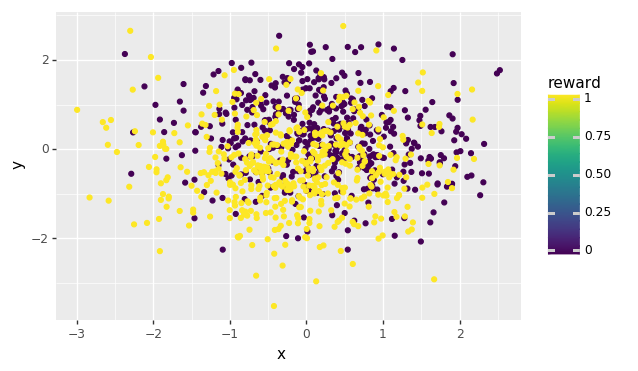

<ggplot: (8730329080553)>

In [5]:
(gg.ggplot(df)
 + gg.aes('x', 'y', color='reward', group='reward')
 + gg.geom_point())

In [8]:
samples = np.zeros((0,dim))
for i in range(100):
    x = langevin(dim, [agent.contexts, agent.rewards], logistic_grad_f, Gaussian_prior_grad_f([0,0]), 
                 step_size = 0.01, n_steps=100, init_pt=None)
    samples = np.append(samples,[x], axis=0)

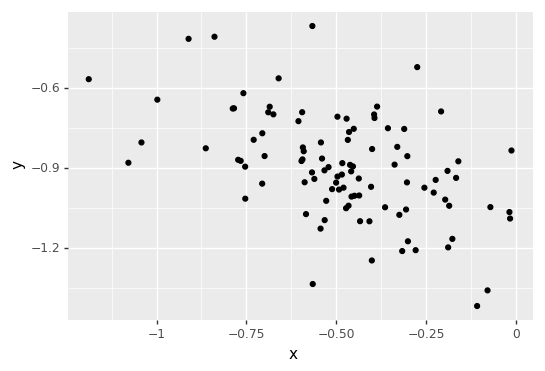

<ggplot: (8730314196913)>

In [9]:
df_samples = pd.DataFrame(samples, columns = ['x','y'])
(gg.ggplot(df_samples)
 + gg.aes('x', 'y')
 + gg.geom_point())

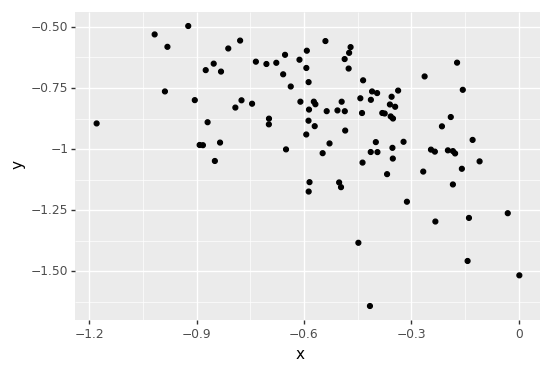

<ggplot: (8730314111425)>

In [10]:
samples = np.zeros((0,dim))
for i in range(100):
    x = langevin(dim, [agent.contexts, agent.rewards], logistic_grad_f, Gaussian_prior_grad_f([0,0]), 
                 step_size = 0.01, n_steps=1000, init_pt=None)
    samples = np.append(samples,[x], axis=0)
    
df_samples = pd.DataFrame(samples, columns = ['x','y'])
(gg.ggplot(df_samples)
 + gg.aes('x', 'y')
 + gg.geom_point())

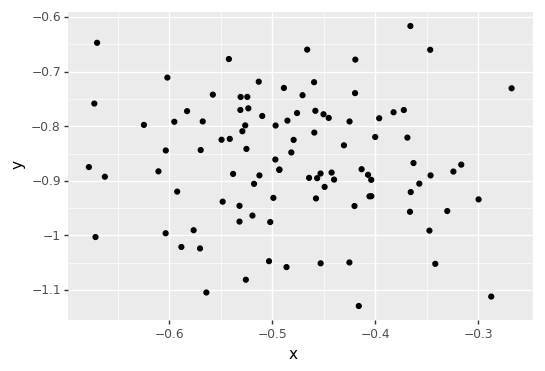

<ggplot: (8730314086757)>

In [11]:
samples = np.zeros((0,dim))
for i in range(100):
    x = langevin(dim, [agent.contexts, agent.rewards], logistic_grad_f, Gaussian_prior_grad_f([0,0]), 
                 step_size = 0.005, n_steps=1000, init_pt=None)
    samples = np.append(samples,[x], axis=0)
    
df_samples = pd.DataFrame(samples, columns = ['x','y'])
(gg.ggplot(df_samples)
 + gg.aes('x', 'y')
 + gg.geom_point())

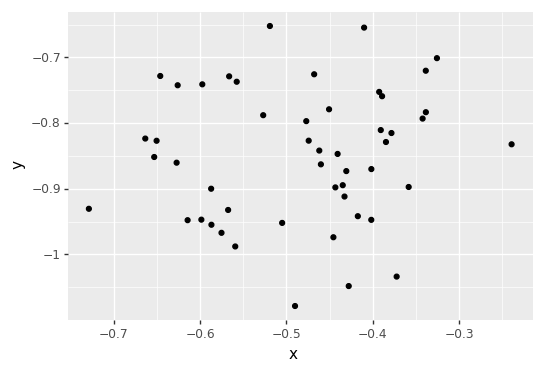

<ggplot: (8730314114897)>

In [12]:
samples = np.zeros((0,dim))
for i in range(50):
    x = langevin(dim, [agent.contexts, agent.rewards], logistic_grad_f, Gaussian_prior_grad_f([0,0]), 
                 step_size = 0.005, n_steps=2000, init_pt=None)
    samples = np.append(samples,[x], axis=0)
    
df_samples = pd.DataFrame(samples, columns = ['x','y'])
(gg.ggplot(df_samples)
 + gg.aes('x', 'y')
 + gg.geom_point())

In [ ]:

theta_mean = 0
theta_std = 1
epsilon1 = 0.01
epsilon2 = 0.05
batch_size = 50
step_count=200
step_size= 1/200

num_articles = 3
dim = 7
theta_mean = 0
theta_std = 1
epsilon1 = 0.01
epsilon2 = 0.05
batch_size = 50
step_count=200
step_size= 1/200
